In [1]:
## import basic libraries to handle data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## import data
iris_data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
## Explore data
np_iris_data = np.array(iris_data)
print(np_iris_data[0:5,:])

[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']]


In [4]:
datax = np_iris_data[:, 0:4]
datay = np_iris_data[:, -1]

print(datax[0:5,:])
print(datay[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa']


In [5]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size=0.3)
print(trnx.shape, tstx.shape, trny.shape, tsty.shape)

(105, 4) (45, 4) (105,) (45,)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trnx)
trnx_scale = scaler.transform(trnx)
tstx_scale = scaler.transform(tstx)
print(np.min(trnx_scale[:, 0]), np.max(trnx_scale[:, 0]))
print(np.min(tstx_scale[:, 0]), np.max(tstx_scale[:, 0]))

0.0 1.0
0.0277777777777779 0.9444444444444442


In [7]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=500)
clf.fit(trnx, trny)
tsty_hat = clf.predict(tstx)

/Users/chopper/.conda/envs/machinelearning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [8]:
print(clf)
print(tsty[0:10])
print(tsty_hat[0:10])

MLPClassifier(hidden_layer_sizes=(10,), max_iter=500)
['versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa']
['virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa']


In [9]:
clf2 = MLPClassifier(hidden_layer_sizes=(10, 15, 10,), max_iter=500)
clf2.fit(trnx, trny)
tsty_hat2 = clf2.predict(tstx)
print(tsty[0:10])
print(tsty_hat2[0:10])

['versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa']
['versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa']


/Users/chopper/.conda/envs/machinelearning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(tsty, tsty_hat), accuracy_score(tsty, tsty_hat2))

0.9111111111111111 1.0


In [11]:
# SVM
from sklearn.svm import SVC
svc_model = SVC(C=100, kernel='rbf', degree=3, gamma=0.1, coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
# svc_model = SVC()
svc_model.fit(X=trnx, y=trny)
tsty_hat = svc_model.predict(tstx)
accuracy_score(tsty, tsty_hat)

0.9333333333333333

In [12]:
print(tsty)
print(tsty_hat)

['versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'virginica' 'setosa' 'virginica' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'virginica']
['versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'virginica' 'setosa' 'virginica' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'virginica' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 's

In [13]:
# Tensorflow keras sequential API
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import layers, models, optimizers

In [14]:
input_shape = (4,)
mlp_model = models.Sequential()
mlp_model.add(layers.Dense(units=10, activation='relu', input_shape=input_shape))
mlp_model.add(layers.Dense(units=20, activation='relu'))
mlp_model.add(layers.Dense(units=10, activation='relu'))
mlp_model.add(layers.Dense(units=3, activation='softmax'))
mlp_model.compile(optimizers='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


2022-05-29 19:13:53.655139: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-29 19:13:53.655400: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [15]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
trny_onehot = encoder.fit_transform(trny)
tsty_onehot = encoder.transform(tsty)

print(trny_onehot[0:5, :])
print(tsty_onehot[0:5, :])

[[0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 1 0]]
[[0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [19]:
history = mlp_model.fit(np.asarray(trnx).astype(float), np.asarray(trny_onehot).astype(float), validation_data=[np.asarray(tstx).astype(float), np.asarray(tsty_onehot).astype(float)], batch_size=10, epochs=50)

Train on 105 samples, validate on 45 samples
Epoch 1/50
105/105 [==============================] - 1s 13ms/sample - loss: 1.0511 - accuracy: 0.2286 - val_loss: 0.9484 - val_accuracy: 0.2889
Epoch 2/50
105/105 [==============================] - 0s 671us/sample - loss: 0.8546 - accuracy: 0.5238 - val_loss: 0.7800 - val_accuracy: 0.6889
Epoch 3/50
105/105 [==============================] - 0s 773us/sample - loss: 0.7452 - accuracy: 0.6667 - val_loss: 0.6647 - val_accuracy: 0.8222
Epoch 4/50
105/105 [==============================] - 0s 682us/sample - loss: 0.6469 - accuracy: 0.7714 - val_loss: 0.5899 - val_accuracy: 0.8667
Epoch 5/50
105/105 [==============================] - 0s 788us/sample - loss: 0.5870 - accuracy: 0.8381 - val_loss: 0.5321 - val_accuracy: 0.8889
Epoch 6/50
105/105 [==============================] - 0s 708us/sample - loss: 0.5393 - accuracy: 0.8190 - val_loss: 0.4862 - val_accuracy: 0.9778
Epoch 7/50
105/105 [==============================] - 0s 698us/sample - loss: 0.

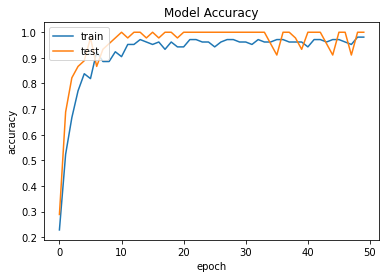

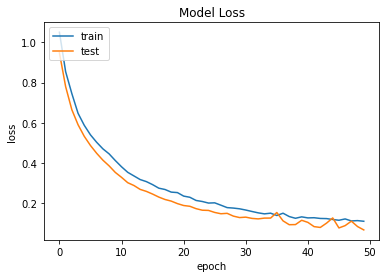

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
input_shape = (4,)

visible = layers.Input(shape=input_shape)
hidden1 = layers.Dense(units=10, activation='relu')(visible)
hidden2 = layers.Dense(units=20, activation='relu')(hidden1)
hidden3 = layers.Dense(units=10, activation='relu')(hidden2)
output = layers.Dense(units=3, activation='softmax')(hidden3)

mlp_function = models.Model(visible, output)
mlp_function.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_5 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 33        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [23]:
mlp_function.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = mlp_function.fit(np.asarray(trnx).astype(float), np.asarray(trny_onehot).astype(float), validation_data=[np.asarray(tstx).astype(float), np.asarray(tsty_onehot).astype(float)], batch_size=10, epochs=50)

Train on 105 samples, validate on 45 samples
Epoch 1/50
105/105 [==============================] - 1s 12ms/sample - loss: 0.7462 - accuracy: 0.8286 - val_loss: 0.5916 - val_accuracy: 0.9556
Epoch 2/50
105/105 [==============================] - 0s 639us/sample - loss: 0.6273 - accuracy: 0.9429 - val_loss: 0.5295 - val_accuracy: 0.9556
Epoch 3/50
105/105 [==============================] - 0s 668us/sample - loss: 0.5665 - accuracy: 0.9143 - val_loss: 0.4885 - val_accuracy: 0.8889
Epoch 4/50
105/105 [==============================] - 0s 679us/sample - loss: 0.5294 - accuracy: 0.9238 - val_loss: 0.4511 - val_accuracy: 0.9556
Epoch 5/50
105/105 [==============================] - 0s 715us/sample - loss: 0.4993 - accuracy: 0.9333 - val_loss: 0.4270 - val_accuracy: 1.0000
Epoch 6/50
105/105 [==============================] - 0s 665us/sample - loss: 0.4772 - accuracy: 0.9333 - val_loss: 0.4069 - val_accuracy: 0.9333
Epoch 7/50
105/105 [==============================] - 0s 688us/sample - loss: 0.

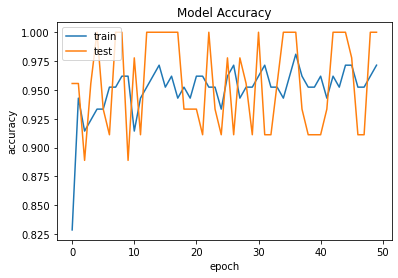

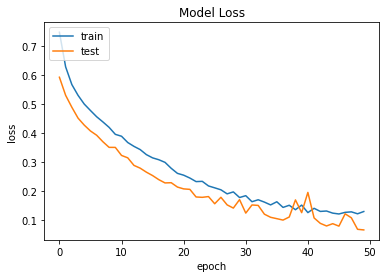

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()